In [1]:
#!/usr/bin/env python3
"""
plot_sr_plus_energy_levels.py

Load Sr⁺ energy‐level data, optionally apply a Zeeman split,
configure layout and style, and plot the level diagram with transitions.
"""

import json
from pathlib import Path
from models import Level
from read import load_ion_data
from splitters import ZeemanSplitter
from layout import LayoutConfig
from style import StyleConfig
from plotter import plot_energy_levels

def plot(path):
    # ─── 1) Load the raw JSON file into our data structure ────────────────────
    # The JSON must contain keys: "ion", "unit", "levels", and optional "transitions".
    # Each level entry is passed through Level(**entry) to create Level objects.
    data_path = Path(str(path))
    raw = json.loads(data_path.read_text())
    levels = [Level(**entry) for entry in raw["levels"]]
    data = {
        "ion":         raw.get("ion", ""),
        "unit":        raw.get("unit", "cm⁻¹"),
        "levels":      levels,
        "transitions": raw.get("transitions", []),
        "title":       raw.get("title", ""),
    }

    # ─── 2) (Optional) Apply a small Zeeman splitting to the levels ───────────
    # This will take each Level and produce sub‐levels with m‐quantum ticks.
    zs = ZeemanSplitter(B=0.01)  # magnetic field strength in Tesla
    split_levels = []
    for lvl in data["levels"]:
        # keep the original level...
        split_levels.append(lvl)
        # ...and extend with its Zeeman‐split children
        split_levels.extend(zs.split(lvl))
    data["levels"] = split_levels

    # ─── 3) Build the layout configuration ────────────────────────────────────
    # - column_letters & positions determine horizontal grouping (S, P, D, F → columns)
    # - spacing: base horizontal distance between columns
    # - bar_half: half‐width of each energy bar
    # - x_jitter: maximum horizontal jitter for sub‐levels around parent
    # - y_jitter: base vertical jitter for stacking levels
    # - energy_group_key: function to bucket levels into fine‐structure groups
    # - energy_group_y_scale: multiplier for vertical fan of base-level groups
    # - sublevel_y_scale: multiplier for extra vertical separation of sub‐levels
    layout = LayoutConfig(
        column_letters   = ["S1/2","P1/2","P3/2","D3/2","D5/2"],
        column_positions = [0,      0,      1,      2,      2],
        spacing               = 1,
        bar_half              = 0.3,
        x_jitter              = 0.25,
        y_jitter              = 100.0,
        energy_group_key      = lambda lvl: int(lvl.energy // 10000),
        energy_group_y_scale  = 30,
        sublevel_uniform_spacing = 1000.0,   # distance between adjacent sublevels
        sublevel_uniform_centered = True   # whether to center around parent
    )

    # ─── 4) Build the style configuration ─────────────────────────────────────
    # StyleConfig defines colors, line widths, tick sizes, etc.
    style = StyleConfig()

    # ─── 5) Plot the diagram ──────────────────────────────────────────────────
    # - data: contains ion name, unit, levels, transitions
    # - layout: controls bar/tick placement
    # - style: controls colors and line widths
    # - show_axis=True draws the y‐axis; set to False to hide it
    plot_energy_levels(data, layout, style, show_axis=False)


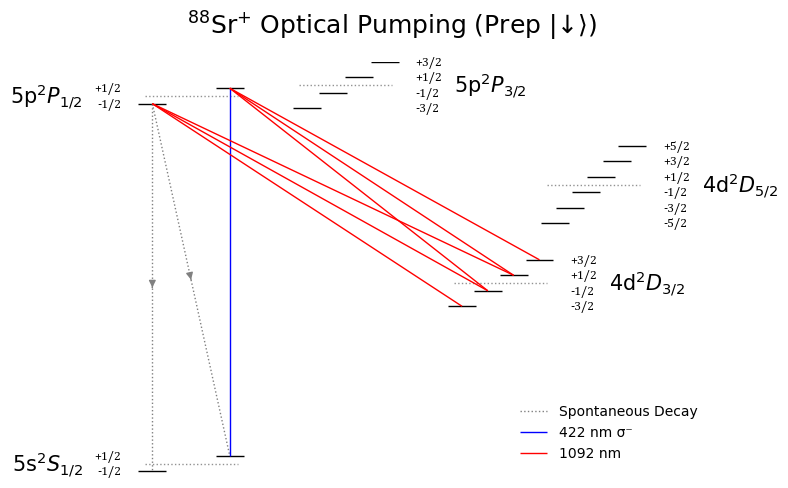

In [2]:
plot("SrPrepDown.json")

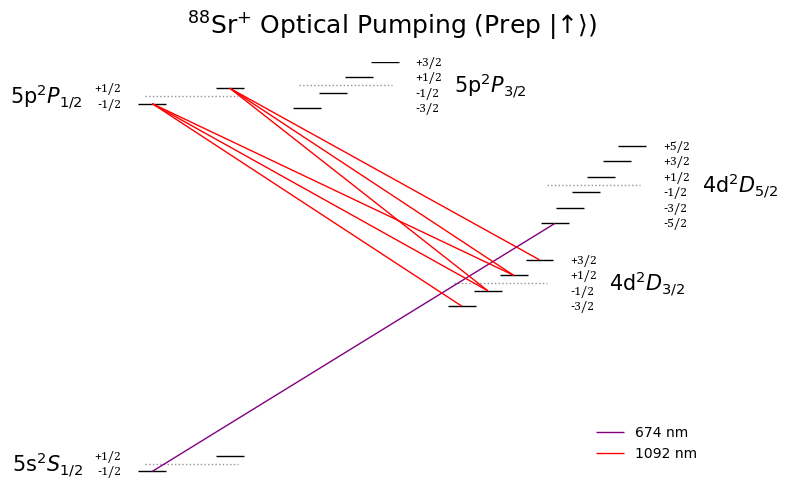

In [3]:
plot("SrPrepUp.json")

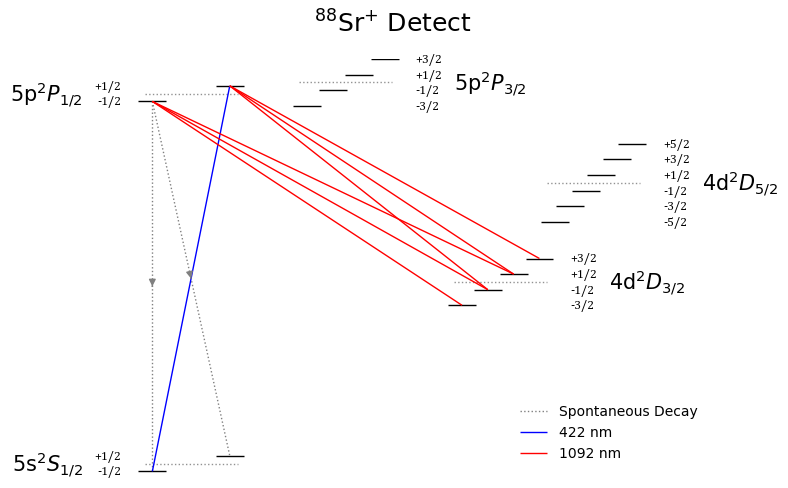

In [4]:
plot("SrDetect.json")

-sr detect
5s2s1/2 mj -1-2 is always decay (gray and dotted and downwards arrow)
-674 purple


space fine strcuture
no dotted between mj, same colour fo r1092

- add legend
- option to put in 2 arrows (also add in a squiggle line)
- layout design addon (magnify splitting)
-  greyout (energy levels without transition are faded)

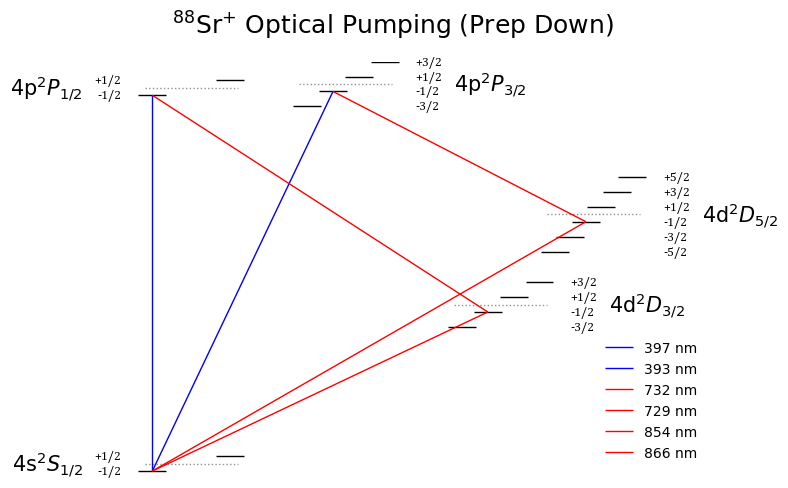

In [5]:
plot("CaTest.json")